In [1]:
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt

## Load the data

In [2]:
d = xr.load_dataset('ensemble.nc')
d

<xarray.Dataset>
Dimensions:      (year: 141, member: 1000)
Coordinates:
  * year         (year) int64 1850 1851 1852 1853 1854 ... 1987 1988 1989 1990
Dimensions without coordinates: member
Data variables:
    emissions    (member, year) float64 13.45 19.51 11.14 ... 32.9 33.12 33.34
    forcing      (member, year) float64 0.1338 0.1931 0.2523 ... 7.538 7.591
    temperature  (member, year) float64 0.01993 0.04438 0.0724 ... 4.695 4.737
    r0           (member) float64 34.24 32.17 37.65 32.63 ... 30.87 33.9 37.95
    rc           (member) float64 0.04698 0.02986 0.0367 ... 0.03002 0.01838
    rt           (member) float64 4.099 0.4684 0.1008 ... 0.05982 2.83 2.267
    F2x          (member) float64 4.127 3.66 3.678 4.437 ... 3.692 3.737 3.717
    tcr          (member) float64 2.757 1.203 1.384 2.498 ... 2.295 2.842 1.912
    ecs          (member) float64 3.57 1.688 2.843 3.399 ... 3.591 4.144 4.671
    other_rf     (member) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    C            (year) float64 284.3 287.2 290.0 ... 1.134e+03 1.145e+03

## Calculate basic statistical properties

As both the input and output data is stored in the netcdf file we can explore
both the parameter space and the response space.

Plot the input ECS and TCR used in forcing the model:

Text(0, 0.5, 'ECS')

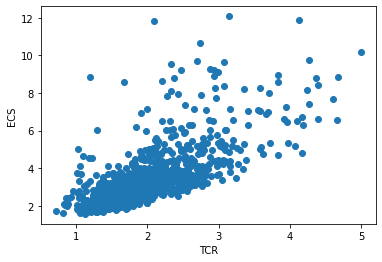

In [4]:
fig, ax = plt.subplots()
ax.scatter(d.tcr, d.ecs)
ax.set_xlabel('TCR')
ax.set_ylabel('ECS')

Plot the ensemble mean emissions curve and ensemble standard deviation:

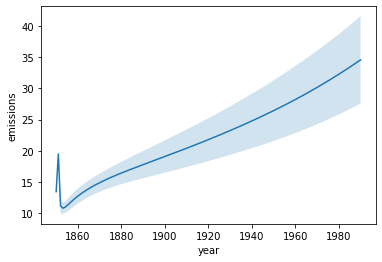

In [3]:
# plot the ensemble mean with +/- 1 std.dev. as a filled region
ens_mean = d.emissions.mean('member')
ens_std = d.emissions.std('member')

fig, ax = plt.subplots()

ax.fill_between(d.year, ens_mean - ens_std, ens_mean + ens_std, alpha=0.2)
ens_mean.plot(ax=ax)